In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [84]:
# 파일 경로 (D드라이브 → SEOUL 폴더 → '서울시 공동주택 아파트 정보.xlsx')
file_path = r"D:\SEOUL\서울시 공동주택 아파트 정보.xlsx"

# 엑셀 파일을 불러와서 apartment라는 이름의 DataFrame으로 저장
apartment = pd.read_excel(file_path)

# 잘 불러왔는지 확인 (앞부분 5줄만 출력)
print(apartment.head())

   번호    k-아파트코드      k-아파트명 k-단지분류               kapt도로명주소  \
0   1  A15679103       우리유앤미    아파트        서울특별시 동작구 서달로 83   
1   2  A13876112  송파파인타운13단지    아파트     서울특별시 송파구 송파대로8길 10   
2   3  A13873701  오금현대백조(임대)    아파트    서울특별시 송파구 양재대로72길 20   
3   4  A15275101        개봉건영    아파트  서울특별시 구로구 고척로21나길 85-6   
4   6  A13991016    월계동원베네스트    아파트     서울특별시 노원구 월계로53길 21   

  주소(시도)k-apt주소split 주소(시군구) 주소(읍면동)                나머지주소  주소(도로명)  ...  \
0                 서울     동작구     흑석동             우리유앤미아파트      서달로  ...   
1                 서울     송파구     장지동                  857   송파대로8길  ...   
2                 서울     송파구     오금동  2025-02-20 00:00:00  양재대로72길  ...   
3                 서울     구로구     개봉동  1947-01-01 00:00:00  고척로21나길  ...   
4                 서울     노원구     월계동   서울시 노원구 월계2동 940번지   월계로53길  ...   

  청소비관리형태     건축면적   주차대수  기타/의무/임대/임의=1/2/3/4               단지승인일 사용허가여부  \
0      위탁  1773.56  223.0                   의무 2018-04-10 15:59:42      Y   
1      위탁     0.

In [85]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [86]:
# DataFrame의 요약 정보 확인
apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   번호                      2842 non-null   int64         
 1   k-아파트코드                 2842 non-null   object        
 2   k-아파트명                  2842 non-null   object        
 3   k-단지분류                  2792 non-null   object        
 4   kapt도로명주소               2779 non-null   object        
 5   주소(시도)k-apt주소split      2842 non-null   object        
 6   주소(시군구)                 2842 non-null   object        
 7   주소(읍면동)                 2842 non-null   object        
 8   나머지주소                   2133 non-null   object        
 9   주소(도로명)                 2797 non-null   object        
 10  주소(도로상세주소)              2790 non-null   object        
 11  k-전화번호                  2835 non-null   object        
 12  k-팩스번호                  2824 non-null   object  

In [87]:
# 시군구별 빈도 구하기
freq = apartment['주소(시군구)'].value_counts()

# 시군구별 백분율 구하기
percent = apartment['주소(시군구)'].value_counts(normalize=True) * 100

# 결과 합치기 (DataFrame으로 보기 좋게)
result = pd.DataFrame({'빈도': freq, '백분율(%)': percent.round(2)})

print(result.head(10))  # 상위 10개만 출력

          빈도  백분율(%)
주소(시군구)             
강남구      227    7.99
노원구      214    7.53
강서구      168    5.91
영등포구     160    5.63
서초구      159    5.59
구로구      144    5.07
송파구      143    5.03
성북구      134    4.71
은평구      127    4.47
강동구      124    4.36


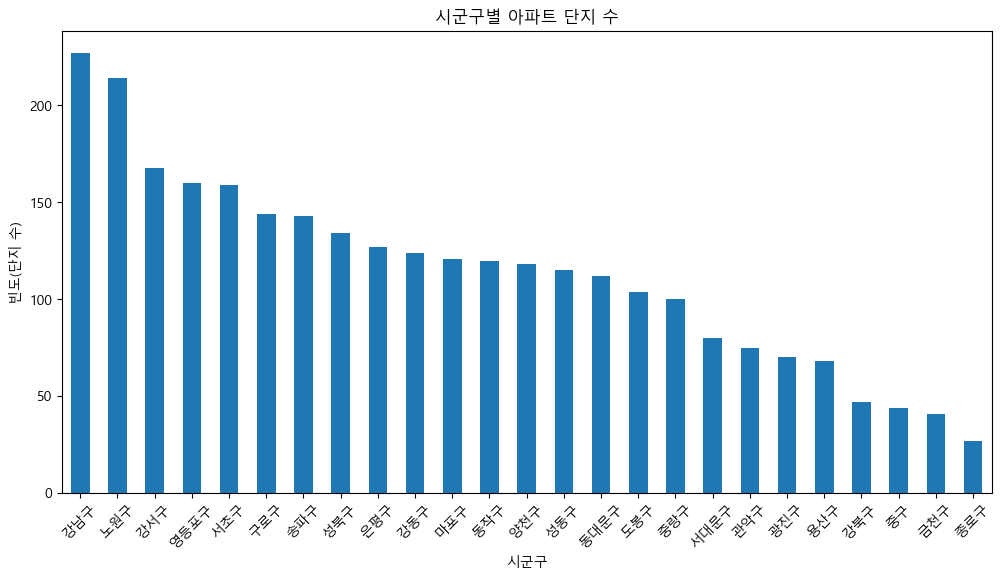

In [88]:
# 시군구별 빈도를 막대그래프로 시각화
freq.plot(kind='bar', figsize=(12, 6))

plt.title("시군구별 아파트 단지 수")
plt.xlabel("시군구")
plt.ylabel("빈도(단지 수)")
plt.xticks(rotation=45)  # x축 글자 기울여서 보기 좋게
plt.show()

In [89]:
# 조건 설정
conditions = [
    (apartment['k-전체세대수'] >= 0) & (apartment['k-전체세대수'] < 500),
    (apartment['k-전체세대수'] >= 500) & (apartment['k-전체세대수'] < 1000),
    (apartment['k-전체세대수'] >= 1000) & (apartment['k-전체세대수'] < 2000),
    (apartment['k-전체세대수'] >= 2000) & (apartment['k-전체세대수'] < 3000),
    (apartment['k-전체세대수'] >= 3000) & (apartment['k-전체세대수'] < 5000),
    (apartment['k-전체세대수'] >= 5000)
]

# 각 조건에 해당하는 값
choices = ['초소형', '소형', '중형', '대형', '특대형', '초대형']

# 새로운 열 생성
apartment['k-전체세대수group'] = np.select(conditions, choices, default='기타')

# 확인
print(apartment[['k-전체세대수', 'k-전체세대수group']].head(10))

   k-전체세대수 k-전체세대수group
0      206          초소형
1      197          초소형
2      153          초소형
3      209          초소형
4      205          초소형
5      150          초소형
6      150          초소형
7      150          초소형
8      150          초소형
9      150          초소형


In [90]:
# 빈도 구하기
freq_group = apartment['k-전체세대수group'].value_counts()

# 백분율 구하기
percent_group = apartment['k-전체세대수group'].value_counts(normalize=True) * 100

# 보기 좋게 DataFrame으로 합치기
result_group = pd.DataFrame({
    '빈도': freq_group,
    '백분율(%)': percent_group.round(2)
})

print(result_group)

                빈도  백분율(%)
k-전체세대수group              
초소형           1774   62.42
소형             653   22.98
중형             306   10.77
대형              70    2.46
특대형             31    1.09
초대형              8    0.28


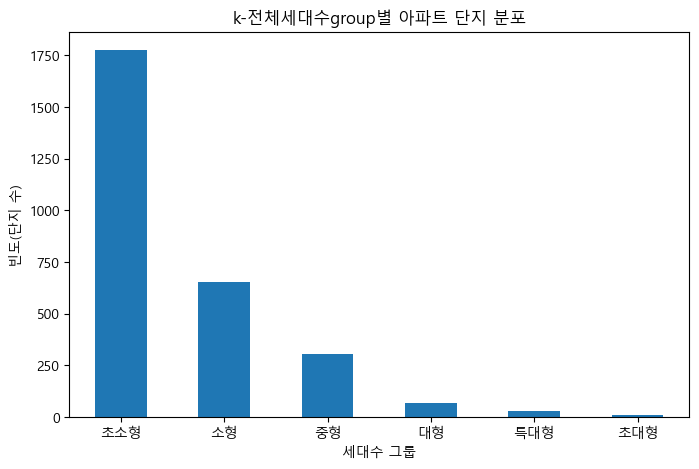

In [91]:
# 막대그래프 (빈도 기준)
freq_group.plot(kind='bar', figsize=(8, 5))

plt.title("k-전체세대수group별 아파트 단지 분포")
plt.xlabel("세대수 그룹")
plt.ylabel("빈도(단지 수)")
plt.xticks(rotation=0)  # x축 글자 똑바로 세우기
plt.show()

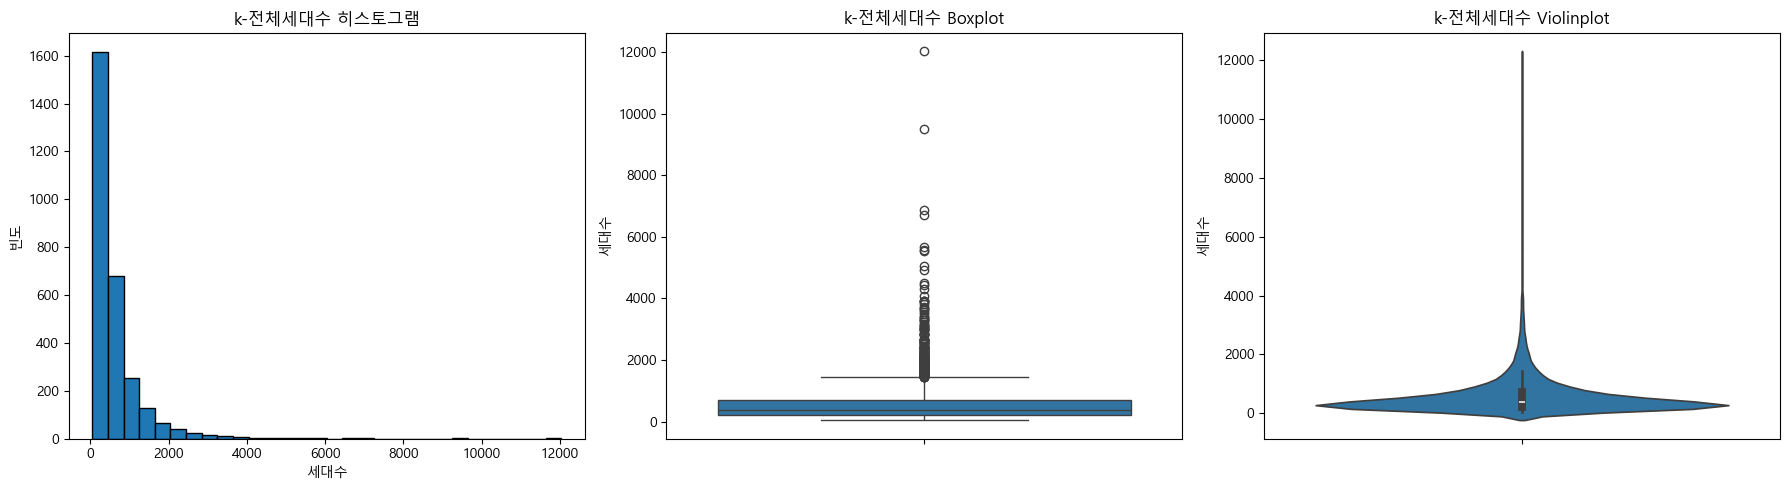

In [92]:
plt.figure(figsize=(18, 5))  # 전체 그래프 크기 (가로로 넓게)

# 1. 히스토그램
plt.subplot(1, 3, 1)  # 1행 3열 중 첫 번째
plt.hist(apartment['k-전체세대수'], bins=30, edgecolor='black')
plt.title("k-전체세대수 히스토그램")
plt.xlabel("세대수")
plt.ylabel("빈도")

# 2. 상자그림 (Boxplot)
plt.subplot(1, 3, 2)  # 1행 3열 중 두 번째
sns.boxplot(y=apartment['k-전체세대수'])
plt.title("k-전체세대수 Boxplot")
plt.ylabel("세대수")

# 3. 바이올린그림 (Violinplot)
plt.subplot(1, 3, 3)  # 1행 3열 중 세 번째
sns.violinplot(y=apartment['k-전체세대수'])
plt.title("k-전체세대수 Violinplot")
plt.ylabel("세대수")

# 전체 보여주기
plt.tight_layout()
plt.show()

In [93]:
# 기본 기술통계량 (count, mean, std, min, 25%, 50%, 75%, max)
stats = apartment['k-전체세대수'].describe()
print(stats)

count     2842.000000
mean       601.292752
std        684.980141
min         52.000000
25%        221.250000
50%        386.500000
75%        713.750000
max      12032.000000
Name: k-전체세대수, dtype: float64


=== 빈도표 ===
k-단지분류   도시형 생활주택(아파트)  도시형 생활주택(주상복합)  아파트  연립주택  주상복합
주소(시군구)                                                
강남구                  0               0  184     2    23
강동구                  1               0  106     1    16
강북구                  0               0   42     0     5
강서구                  0               1  161     0     5
관악구                  0               0   70     0     3

=== 행 백분율(%) ===
k-단지분류   도시형 생활주택(아파트)  도시형 생활주택(주상복합)        아파트      연립주택       주상복합
주소(시군구)                                                               
강남구           0.000000        0.000000  88.038278  0.956938  11.004785
강동구           0.806452        0.000000  85.483871  0.806452  12.903226
강북구           0.000000        0.000000  89.361702  0.000000  10.638298
강서구           0.000000        0.598802  96.407186  0.000000   2.994012
관악구           0.000000        0.000000  95.890411  0.000000   4.109589


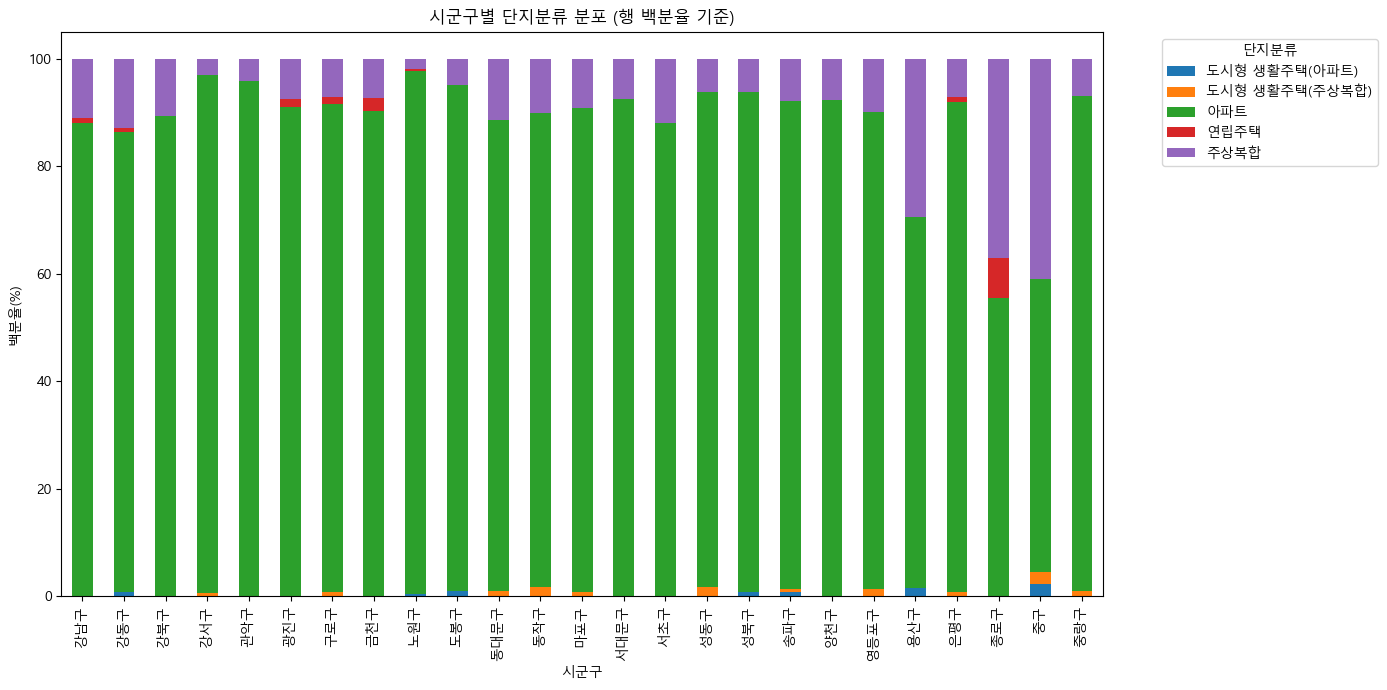

In [94]:
# 1. 교차표 (빈도표)
# ==============================
ct_freq = pd.crosstab(apartment['주소(시군구)'], apartment['k-단지분류'])

# ==============================
# 2. 교차표 (행 백분율)
# ==============================
ct_row_pct = pd.crosstab(
    apartment['주소(시군구)'], 
    apartment['k-단지분류'], 
    normalize='index'   # 행 기준 정규화
) * 100

print("=== 빈도표 ===")
print(ct_freq.head())   # 일부 미리보기
print("\n=== 행 백분율(%) ===")
print(ct_row_pct.head())

# ==============================
# 3. 누적 막대그래프 (행 백분율 기준)
# ==============================
plt.rc('font', family='Malgun Gothic')   # 한글 깨짐 방지
plt.rc('axes', unicode_minus=False)

ct_row_pct.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title("시군구별 단지분류 분포 (행 백분율 기준)")
plt.xlabel("시군구")
plt.ylabel("백분율(%)")
plt.legend(title="단지분류", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 오른쪽 바깥
plt.tight_layout()
plt.show()

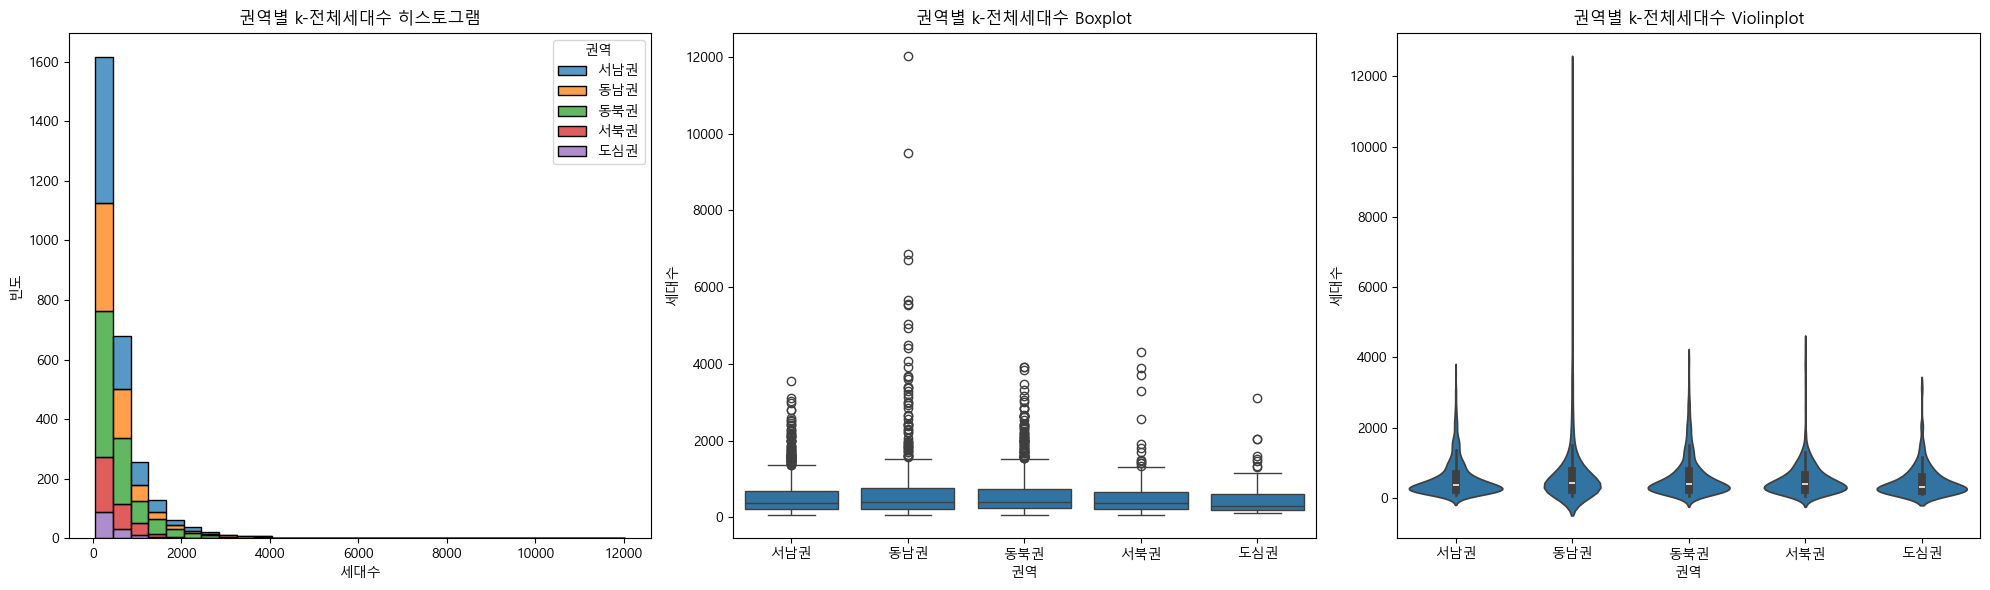

In [95]:
# 권역별 매핑 딕셔너리
region_map = {
    '종로구':'도심권','중구':'도심권','용산구':'도심권',
    '성동구':'동북권','광진구':'동북권','동대문구':'동북권','중랑구':'동북권',
    '성북구':'동북권','강북구':'동북권','도봉구':'동북권','노원구':'동북권',
    '은평구':'서북권','서대문구':'서북권','마포구':'서북권',
    '양천구':'서남권','강서구':'서남권','구로구':'서남권','금천구':'서남권',
    '영등포구':'서남권','동작구':'서남권','관악구':'서남권',
    '서초구':'동남권','강남구':'동남권','송파구':'동남권','강동구':'동남권'
}

# 권역 컬럼 추가
apartment['권역'] = apartment['주소(시군구)'].map(region_map)

# 한글 깨짐 방지
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(20, 6))

# ===== 1. 히스토그램 =====
plt.subplot(1, 3, 1)
sns.histplot(data=apartment, x="k-전체세대수", hue="권역", multiple="stack", bins=30)
plt.title("권역별 k-전체세대수 히스토그램")
plt.xlabel("세대수")
plt.ylabel("빈도")

# ===== 2. 상자그림 (Boxplot) =====
plt.subplot(1, 3, 2)
sns.boxplot(x="권역", y="k-전체세대수", data=apartment)
plt.title("권역별 k-전체세대수 Boxplot")
plt.xlabel("권역")
plt.ylabel("세대수")

# ===== 3. 바이올린 그림 (Violinplot) =====
plt.subplot(1, 3, 3)
sns.violinplot(x="권역", y="k-전체세대수", data=apartment)
plt.title("권역별 k-전체세대수 Violinplot")
plt.xlabel("권역")
plt.ylabel("세대수")

plt.tight_layout()
plt.show()

In [96]:
# 기본 기술통계량
stats = apartment.groupby("주소(시군구)")["k-전체세대수"].describe()
print(stats)

         count        mean          std    min     25%    50%      75%  \
주소(시군구)                                                                  
강남구      227.0  621.969163   807.918112   54.0  193.50  378.0   735.00   
강동구      124.0  792.056452  1288.682104   74.0  226.00  460.0   807.50   
강북구       47.0  713.063830   674.340335  167.0  260.50  430.0  1075.50   
강서구      168.0  577.375000   529.134880  110.0  212.75  357.5   680.00   
관악구       75.0  650.493333   688.682455  109.0  202.00  363.0   791.00   
광진구       70.0  407.200000   317.610855  119.0  205.00  299.5   447.00   
구로구      144.0  520.500000   413.483750  100.0  251.25  376.0   656.25   
금천구       41.0  656.024390   606.772589  109.0  210.00  341.0   986.00   
노원구      214.0  759.990654   738.865600  115.0  268.50  485.0   848.75   
도봉구      104.0  587.778846   616.816521  105.0  202.00  341.5   667.50   
동대문구     112.0  591.857143   543.347513   52.0  242.50  382.0   746.75   
동작구      120.0  519.800000   394.16772

In [97]:
# 시군구별 변동계수 (CV = std / mean)
cv = apartment.groupby("주소(시군구)")["k-전체세대수"].agg(['mean','std'])
cv['CV'] = cv['std'] / cv['mean']

print(cv[['CV']].round(3))  

            CV
주소(시군구)       
강남구      1.299
강동구      1.627
강북구      0.946
강서구      0.916
관악구      1.059
광진구      0.780
구로구      0.794
금천구      0.925
노원구      0.972
도봉구      1.049
동대문구     0.918
동작구      0.758
마포구      0.976
서대문구     1.004
서초구      1.083
성동구      0.828
성북구      0.967
송파구      1.537
양천구      1.027
영등포구     0.805
용산구      0.780
은평구      0.798
종로구      0.717
중구       1.107
중랑구      0.811


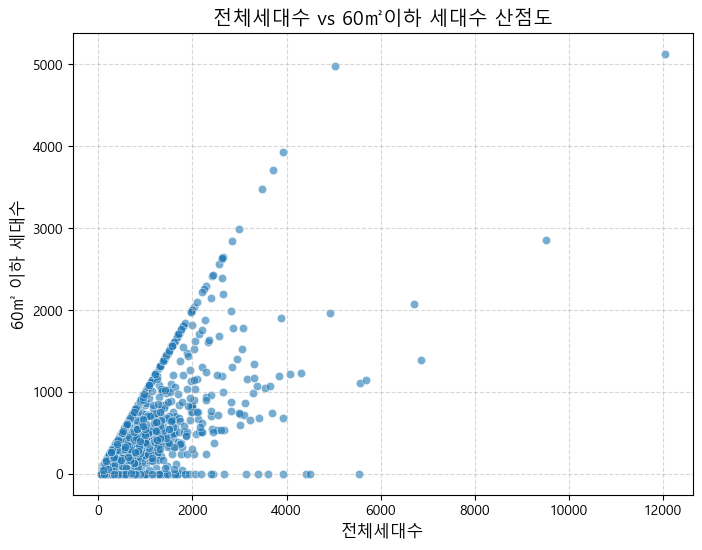

In [98]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=apartment,
    x="k-전체세대수",
    y="k-전용면적별세대현황(60㎡이하)",
    alpha=0.6   # 점 투명도 (겹칠 때 보기 좋게)
)

plt.title("전체세대수 vs 60㎡이하 세대수 산점도", fontsize=14)
plt.xlabel("전체세대수", fontsize=12)
plt.ylabel("60㎡ 이하 세대수", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [99]:
# 상관계수 구하기
corr = apartment['k-전체세대수'].corr(apartment['k-전용면적별세대현황(60㎡이하)'])
print("상관계수:", round(corr, 3))

상관계수: 0.702


In [100]:
print(apartment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   번호                      2842 non-null   int64         
 1   k-아파트코드                 2842 non-null   object        
 2   k-아파트명                  2842 non-null   object        
 3   k-단지분류                  2792 non-null   object        
 4   kapt도로명주소               2779 non-null   object        
 5   주소(시도)k-apt주소split      2842 non-null   object        
 6   주소(시군구)                 2842 non-null   object        
 7   주소(읍면동)                 2842 non-null   object        
 8   나머지주소                   2133 non-null   object        
 9   주소(도로명)                 2797 non-null   object        
 10  주소(도로상세주소)              2790 non-null   object        
 11  k-전화번호                  2835 non-null   object        
 12  k-팩스번호                  2824 non-null   object  

In [101]:
# one-hot encoding 수행
X_encoded = pd.get_dummies(
    X, 
    columns=['k-단지분류', '주소(시군구)'], 
    drop_first=True  # 다중공선성 방지를 위해 첫 번째 카테고리는 제거
)

print("인코딩 전 shape:", X.shape)
print("인코딩 후 shape:", X_encoded.shape)
print(X_encoded.head())

인코딩 전 shape: (2842, 48)
인코딩 후 shape: (2842, 74)
   번호    k-아파트코드      k-아파트명               kapt도로명주소 주소(시도)k-apt주소split  \
0   1  A15679103       우리유앤미        서울특별시 동작구 서달로 83                 서울   
1   2  A13876112  송파파인타운13단지     서울특별시 송파구 송파대로8길 10                 서울   
2   3  A13873701  오금현대백조(임대)    서울특별시 송파구 양재대로72길 20                 서울   
3   4  A15275101        개봉건영  서울특별시 구로구 고척로21나길 85-6                 서울   
4   6  A13991016    월계동원베네스트     서울특별시 노원구 월계로53길 21                 서울   

  주소(읍면동)                나머지주소  주소(도로명)           주소(도로상세주소)     k-전화번호  ...  \
0     흑석동             우리유앤미아파트      서달로                   83   28127541  ...   
1     장지동                  857   송파대로8길                   10   24002658  ...   
2     오금동  2025-02-20 00:00:00  양재대로72길                   20   24000298  ...   
3     개봉동  1947-01-01 00:00:00  고척로21나길  1985-06-01 00:00:00  220878606  ...   
4     월계동   서울시 노원구 월계2동 940번지   월계로53길                   21   29029567  ...   

  주소(시군구)_성동구  주소(시군

In [82]:
# y: 목표변수
y = apartment['k-전체세대수']

# X: 입력변수 (전체에서 y 컬럼 제외)
X = apartment.drop(columns=['k-전체세대수'])

# 훈련/평가 데이터 분할 (70% : 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,   # 평가 데이터 비율
    random_state=42  # 재현성(실행할 때마다 같은 결과 나오게)
)

print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("평가 데이터 크기:", X_test.shape, y_test.shape)

훈련 데이터 크기: (1989, 48) (1989,)
평가 데이터 크기: (853, 48) (853,)


In [102]:
# 1. 훈련/테스트 데이터 준비
# ---------------------------
# y = apartment['k-전체세대수']
# X = apartment.drop(columns=['k-전체세대수'])
# 👉 여기서 X는 이미 one-hot encoding 완료된 버전이라고 가정 (X_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

# ---------------------------
# 2. 모델 정의
# ---------------------------
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# ---------------------------
# 3. 훈련 + 평가
# ---------------------------
rmse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)            # 훈련
    y_pred = model.predict(X_test)         # 평가 데이터 예측
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")

# ---------------------------
# 4. 결과 정리
# ---------------------------
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=["Model", "RMSE"])
print("\n=== RMSE 비교 ===")
print(rmse_df.sort_values(by="RMSE"))

TypeError: Cannot cast DatetimeArray to dtype float64